In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
np.random.seed(42)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [4]:
df = pd.read_csv('zoo.csv', index_col='animal_name')

In [ ]:
classes = pd.read_csv('class.csv')

In [3]:
classes

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
hair          101 non-null int64
feathers      101 non-null int64
eggs          101 non-null int64
milk          101 non-null int64
airborne      101 non-null int64
aquatic       101 non-null int64
predator      101 non-null int64
toothed       101 non-null int64
backbone      101 non-null int64
breathes      101 non-null int64
venomous      101 non-null int64
fins          101 non-null int64
legs          101 non-null int64
tail          101 non-null int64
domestic      101 non-null int64
catsize       101 non-null int64
class_type    101 non-null int64
dtypes: int64(17)
memory usage: 14.2+ KB


Generate a bar plot of target values

In [129]:
class_name_dict = {1: 'Mammals', 2:'Birds', 3:'Reptiles', 4:'Fish', 5:'Amphibians', 6:'Insects', 
                   7:'Non-Insect Invertebrates'}

Map from class numbers to strings

In [131]:
df['class_type'] = df['class_type'].apply(lambda s: class_name_dict.get(s) if s in class_name_dict else s)

In [133]:
class_type_series = df['class_type'].value_counts()

In [142]:
class_values = class_type_series.values

In [137]:
class_lst = list(class_type_series.index)

In [134]:
x_pos = np.arange(len(class_type_series)) #for specifying the x positions of the bar plot

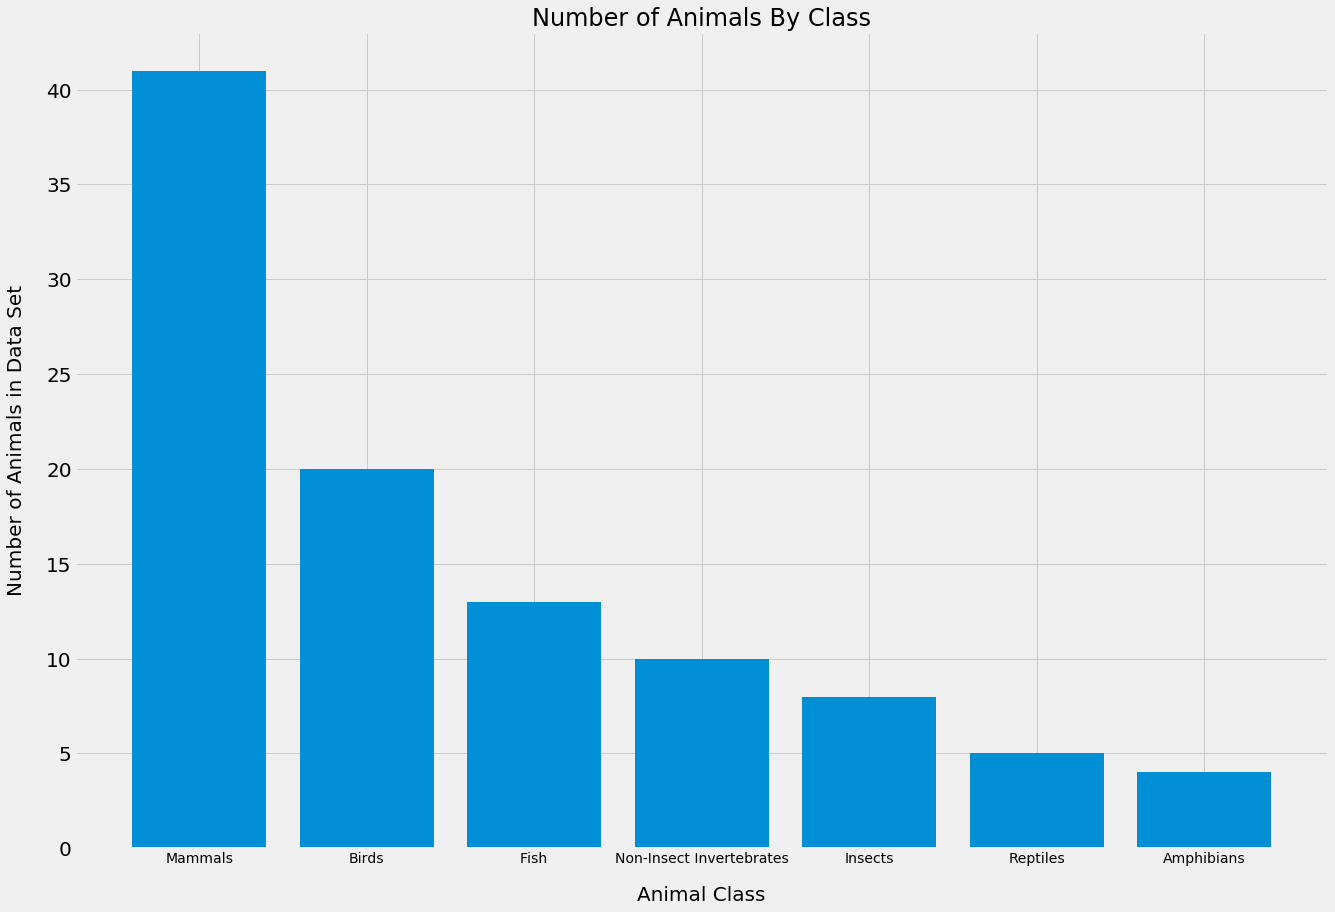

In [152]:
fig = plt.figure(figsize=(20,14)) #increase graph size
plt.bar(x_pos, class_values, align='center') #plot the vertical bars --> position, bar length
plt.xticks(x_pos, class_lst, size=14) #label the horizontal bars with the model names
plt.yticks(size=20)
plt.xlabel('Animal Class', size=20, labelpad=20) #labelpad increases space between xlabel and xaxis)
plt.ylabel('Number of Animals in Data Set', size=20, labelpad=20)
plt.title('Number of Animals By Class', size=24)
plt.savefig('number_of_animals_by_class.PNG', bbox_inches='tight') #save the plot to a file, remove extra whitespace from saved file;

The data is clean with no missing values or outliers. I'll build models with different algorithms and see how they score. I'll take the highest scoring models continue forward with those.  

Split into train/test data.  
80% of the data is used for training, 20% is used for testing.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.loc[:, 'hair':'catsize'].values
y = df['class_type'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [10]:
sc = MinMaxScaler().fit(X_train) # scale the data
X_train_std = sc.transform(X_train)
sc1 = MinMaxScaler().fit(X_test)
X_test_std = sc1.transform(X_test)

/Users/eric/anaconda/envs/python3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Given the number of training observations ~80 and the number of features 14, logistic regression will not have properly calibrated probabilities. We need at least 10 observations per feature. I will not use logistic regression.  

Naive bayes requires features to be independent. Since I have features with high correlation like `fins` and `aquatic`, I will not use naive bayes.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
models = [KNeighborsClassifier(), # set a value for n_neighbors
#           LogisticRegression(),
#           BernoulliNB(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(random_state = 42)]

model_names = ['KNN', 
#                'Logistic Regression', 
#                'Naive Bayes', 
               'SVM', 
               'Decision Tree', 
               'Random Forest']

In [13]:
def run_models_get_scores(X_train, y_train, X_test, y_test, models, model_names):
    '''
    X_train : (df) or (array) of training features
    y_train: (series) or (array) of training targets
    X_test: (df) or (array) of training features
    y_test: (series) or (array) of testing targets
    models: a list of models
    model_names: a list of model names
    output: a dataframe of accuracy, cross validation, precision, recall and f1 scores
    '''   
    accuracy = []
    train_accuracy = []
    cross_validation = []
    precision = []
    recall = []
    f1 = []
    specificity = []
    
    for model in models:
        model.fit(X_train, y_train.ravel())
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
        cv_score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1)
        
        # save confusion matrix and slice into four pieces
        confusion = confusion_matrix(y_test, y_pred)

        #[row, column]
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        specificity_score = TN / (TN + FP) # specificity is not native to sklearn's metrics, so I manually added it

        accuracy.append(accuracy_score(y_test, y_pred))
        train_accuracy.append(accuracy_score(y_train, y_train_pred))
        precision.append(precision_score(y_test, y_pred, average='micro'))
        recall.append(recall_score(y_test, y_pred, average='micro'))
        f1.append(f1_score(y_test, y_pred, average='micro'))
        specificity.append(specificity_score)
        cross_validation.append(cv_score.mean())

    df = pd.DataFrame({'Model' : model_names,
                       'Test Accuracy' : accuracy,
                       'Train Accuracy' : train_accuracy,
                       'Cross Validation Accuracy' : cross_validation,
                       'Precision' : precision,
                       'Recall': recall,  
                       'F1' : f1,
                       'Specificity' : specificity        
                       })
    df.set_index('Model')

    return df

In [14]:
results = run_models_get_scores(X_train, y_train, X_test, y_test, models, model_names)

In [15]:
results

,Cross Validation Accuracy,F1,Model,Precision,Recall,Specificity,Test Accuracy,Train Accuracy
0,0.800778,0.952381,KNN,0.952381,0.952381,1.0,0.952381,0.9375
1,0.838426,0.904762,SVM,0.904762,0.904762,1.0,0.904762,0.9375
2,0.924704,1.000000,Decision Tree,1.000000,1.000000,1.0,1.000000,1.0000
3,0.926030,1.000000,Random Forest,1.000000,1.000000,1.0,1.000000,1.0000


Make a bar chart of accuracy per model.

In [16]:
scores_df = results[['Model', 'Cross Validation Accuracy']]

In [17]:
scores_df =  results[['Model', 'Cross Validation Accuracy']].sort_values('Cross Validation Accuracy')

In [18]:
models_lst = scores_df['Model'].values
y_pos = np.arange(len(models_lst))
scores_lst = scores_df['Cross Validation Accuracy'].values*100

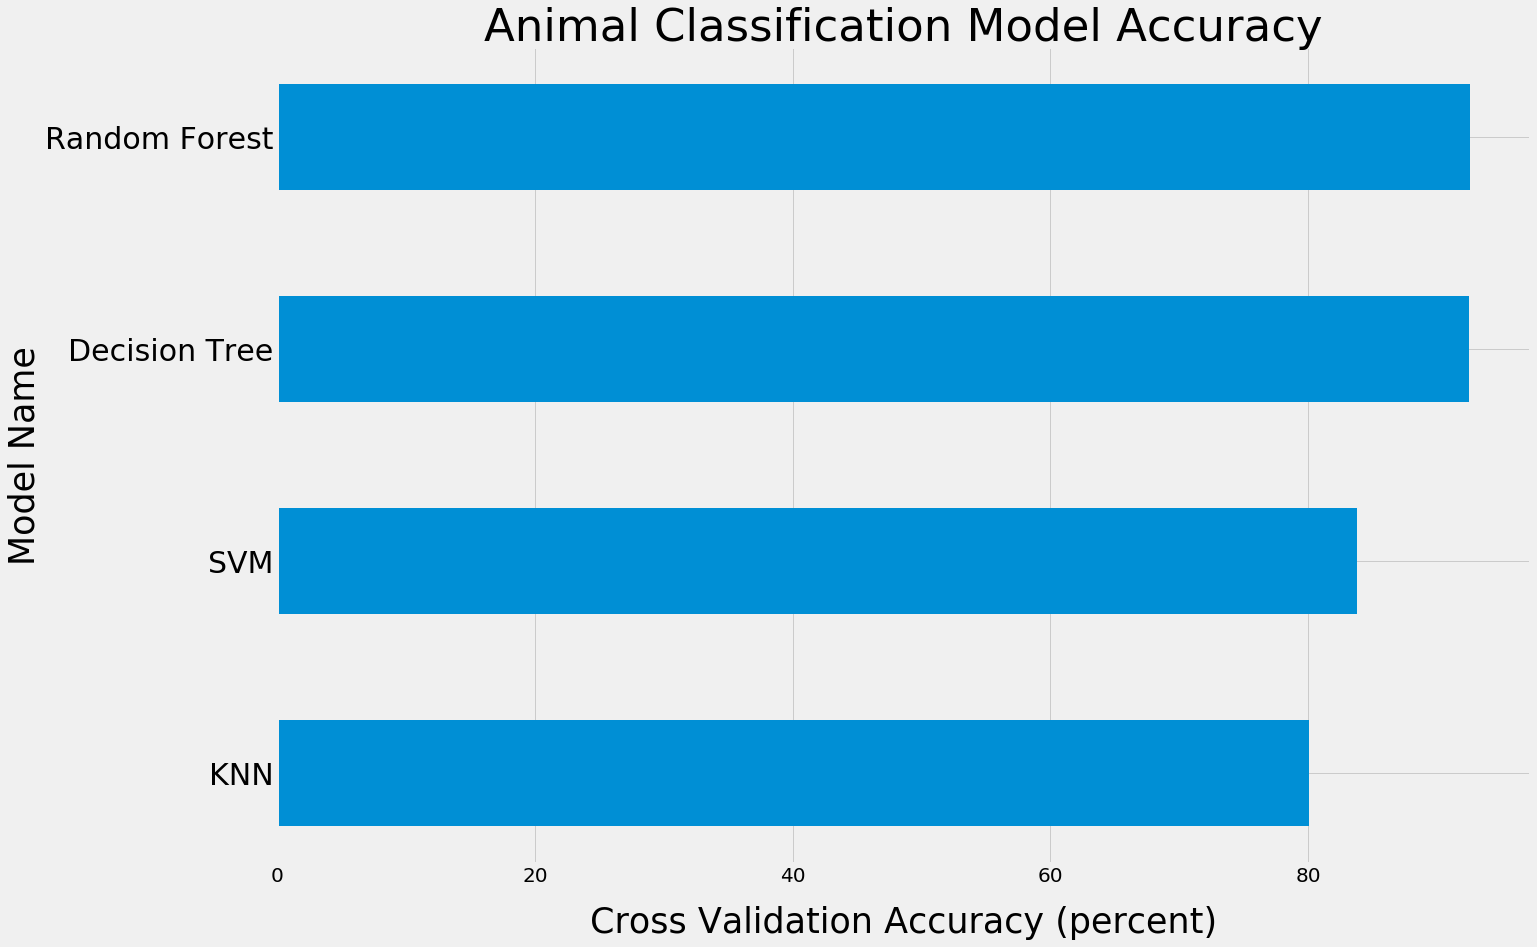

In [19]:
fig = plt.figure(figsize=(20,14))
plt.barh(y_pos, scores_lst, 0.5, align='center')
plt.xticks(size=20)
plt.yticks(y_pos, models_lst, size=30)
plt.xlabel('Cross Validation Accuracy (percent)', size=35, labelpad=20)
plt.ylabel('Model Name', size=35)
plt.title('Animal Classification Model Accuracy', size=45)
plt.savefig('four_model_accuracy_barh.PNG', bbox_inches='tight');

At a first glance, random forest and decision tree are producing high accuracy ~92%. I'll continue forward with these models.